In [86]:
import imageio
import os
import math 
import numpy as np
import time
import matplotlib.pyplot as plt 
 
from IPython.display import set_matplotlib_formats 
set_matplotlib_formats('svg', 'pdf') # For export 
from matplotlib.colors import to_rgba 
import seaborn as sns 
sns.set() 
 
## Progress bar 
from tqdm.notebook import tqdm 
import torch
print("Using torch", torch.__version__) 

Using torch 1.10.0+cu111


In [87]:
imgB = imageio.imread('/content/drive/MyDrive/Colab Notebooks/HW1ac/blue bag.jpg')
imgG =  imageio.imread('/content/drive/MyDrive/Colab Notebooks/HW1ac/green plate.jpg')
imgR =  imageio.imread('/content/drive/MyDrive/Colab Notebooks/HW1ac/red cap.jpg')

In [88]:
from torchvision import transforms

convertTens = transforms.ToTensor()

imgBt = convertTens(imgB)
imgBr = convertTens(imgG)
imgRt = convertTens(imgR)

In [89]:
#Changing the Layout
outB = imgBt.permute(2,0,1)


In [90]:
RB_mean, GB_mean ,BB_mean = torch.mean(imgBt, dim = [1,2])

RR_mean, GR_mean ,BR_mean = torch.mean(imgBr, dim = [1,2])

RT_mean, GT_mean ,BT_mean = torch.mean(imgRt, dim = [1,2])

print('Red Brightness Value is ', RB_mean)

print('Green Brightness Value is ', GB_mean)

print('Blue Brightness Value is ', BB_mean)

Red Brightness Value is  tensor(0.6331)
Green Brightness Value is  tensor(0.5424)
Blue Brightness Value is  tensor(0.4176)


In [ ]:
batch_size = 3
batch = torch.zeros(batch_size, 3, 640, 640, dtype=torch.uint8)

In [ ]:
#END OF PROBLEM 1

In [11]:
#Start of Problem 2

%matplotlib inline
import numpy as np
import torch
torch.set_printoptions(edgeitems=2)



t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0,
                    3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9,
                    33.9, 21.8, 48.4, 60.4, 68.4])
t_un = 0.1 * t_u



In [12]:
def model(t_u, w, w1, b):
    return w1 * t_u ** 2 + w * t_u + b



In [13]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    
    return squared_diffs.mean()

In [19]:
loss = loss_fn(t_p, t_c)
loss


tensor(11709471.)

In [20]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
params.grad is None

loss = loss_fn(model(t_u, *params), t_c)
loss.backward()

params.grad


tensor([3.6181e+05, 2.3149e+07, 5.9642e+03])

In [21]:
if params.grad is not None:
    params.grad.zero_()
    

In [22]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:  # <1>
            params.grad.zero_()
        
        t_p = model(t_u, *params) 
        loss = loss_fn(t_p, t_c)
        loss.backward()
        
        with torch.no_grad():  # <2>
            params -= learning_rate * params.grad

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [23]:
params = training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-4, 
    params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True), # <1> 
    t_u = t_un, # <2> 
    t_c = t_c)

Epoch 500, Loss 10.708596
Epoch 1000, Loss 8.642083
Epoch 1500, Loss 7.171005
Epoch 2000, Loss 6.123477
Epoch 2500, Loss 5.377227
Epoch 3000, Loss 4.845285
Epoch 3500, Loss 4.465788
Epoch 4000, Loss 4.194724
Epoch 4500, Loss 4.000802
Epoch 5000, Loss 3.861744


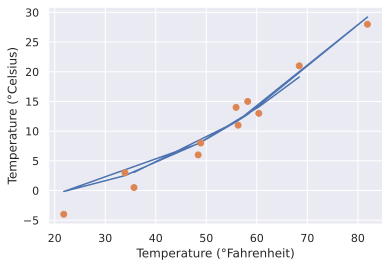

In [24]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p = model(t_un, *params)  # <1>

fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy()) # <2>
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.savefig("temp_unknown_plot.png", format="png")  # bookskip

In [27]:
#END of Problem 2, Start of Problem 3

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#Define the model 
import torch
import torch.nn as nn
import torch.nn.functional as F

In [31]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HW1ac/Housing.csv')

In [32]:
dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [34]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price'] 
Newtrain = dataset[num_vars] 
Newtrain.head() 

,area,bedrooms,bathrooms,stories,parking,price
0,7420,4,2,3,2,13300000
1,8960,4,4,4,3,12250000
2,9960,3,2,2,2,12250000
3,7500,4,2,2,3,12215000
4,7420,4,1,2,2,11410000


In [47]:
numpy = pd.DataFrame(Newtrain).to_numpy()

In [48]:
numpy

array([[    7420,        4,        2,        3,        2, 13300000],
       [    8960,        4,        4,        4,        3, 12250000],
       [    9960,        3,        2,        2,        2, 12250000],
       ...,
       [    3620,        2,        1,        1,        0,  1750000],
       [    2910,        3,        1,        1,        0,  1750000],
       [    3850,        3,        1,        2,        0,  1750000]])

In [74]:
areaN = numpy[:,0]
areaT = torch.tensor(areaN)

BedroomB = numpy[:,1]
BedBT = torch.tensor(BedroomB)


bathroomS = numpy[:,2]
bathroomsT = torch.tensor(bathroomS)

storesS = numpy[:,3]
storiesT = torch.tensor(storesS)

parkingN = numpy[:,4]
parkingT = torch.tensor(parkingN)

priceN = numpy[:,5]
priceT = torch.tensor(priceN)

areaTn = 0.1 * areaT
BedBTn = 0.1 * BedBT
bathroomsTn = 0.1 * bathroomsT
storiesTn = 0.1*storiesT
parkingTn = 0.1*parkingT



In [69]:
def model(x5,x4,x3,x2,x1,w1, w2,w3,w4,w5, b):
    return w5*x5+w4*x4+w3*x3+w2*x2+w1*x1+b



In [70]:
def loss_fn(u, price):
    squared_diffs = (u - price)**2
    
    return squared_diffs.mean()

In [71]:
params = torch.tensor([1.0, 1.0, 1.0,1.0,1.0, 0], requires_grad=True)
params.grad is None

loss = loss_fn(model(areaT,BedBT,storiesT,parkingT,bathroomsT, *params), priceNT)
loss.backward()

params.grad


tensor([1.3688e+04, 8.4710e+03, 1.8939e+04, 3.1068e+04, 6.2522e+07, 1.0313e+04])

In [78]:

def training_loop(n_epochs, learning_rate, params, areaT,BedBT,storiesT,parkingT,bathroomsT, price):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:  # <1>
            params.grad.zero_()
        
        u = model(areaT,BedBT,storiesT,parkingT,bathroomsT, *params) 
        loss = loss_fn(u, price)
        loss.backward()
        
        with torch.no_grad():  # <2>
            params -= learning_rate * params.grad

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [83]:
params = training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-7, 
    params = torch.tensor([1.0, 1.0, 1.0,1.0,1.0, 0], requires_grad=True), # <1> 
   
    areaT = areaTn,
    BedBT = BedBTn, 
    bathroomsT = bathroomsTn, 
    storiesT = storiesTn, 
    parkingT = parkingTn,
    
    price = priceT)

Epoch 500, Loss 3346717736960.000000
Epoch 1000, Loss 3346683920384.000000
Epoch 1500, Loss 3346649841664.000000
Epoch 2000, Loss 3346616287232.000000
Epoch 2500, Loss 3346582732800.000000
Epoch 3000, Loss 3346548916224.000000
Epoch 3500, Loss 3346514837504.000000
Epoch 4000, Loss 3346481283072.000000
Epoch 4500, Loss 3346447204352.000000
Epoch 5000, Loss 3346413387776.000000


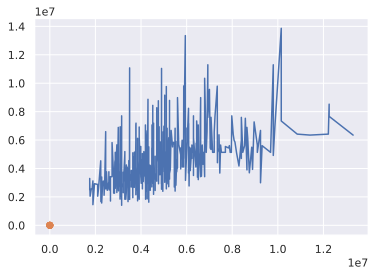

In [82]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p = model(areaTn, BedBTn, bathroomsTn, storiesTn, parkingTn, *params)  # <1>

fig = plt.figure(dpi=600)


plt.plot(priceT.numpy(), t_p.detach().numpy()) # <2>
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
#plt.savefig("temp_unknown_plot.png", format="png")  # bookskip